In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('horse.csv')
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [4]:
data.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [5]:
data.outcome.value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [6]:
features = data.drop(['outcome'], axis = 1)
target = data[['outcome']]

In [7]:
features.shape,target.shape

((299, 27), (299, 1))

In [8]:
features.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [9]:
features_transformed = pd.get_dummies(features)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
X_train , X_test, y_train, y_test = train_test_split(features_transformed, target, random_state = 10)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(224, 67)
(75, 67)
(224, 1)
(75, 1)


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [15]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

## Decision Tree

In [22]:
my_DT_model = DecisionTreeClassifier(class_weight = {'died':1, 'euthanized':2, 'lived':1}, criterion = 'gini',  max_depth = 3, max_leaf_nodes = 6, min_samples_leaf = 1, min_samples_split = 2)
# my_DT_model = DecisionTreeClassifier()

In [23]:
my_DT_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={'died': 1, 'euthanized': 2, 'lived': 1},
                       max_depth=3, max_leaf_nodes=6)

In [24]:
my_preds = my_DT_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
accuracy_score(y_test, my_preds)

0.68

In [27]:
print(confusion_matrix(y_test, my_preds))

[[ 8  0  7]
 [ 2  4  5]
 [ 4  6 39]]


In [28]:
print(classification_report(y_test, my_preds))

              precision    recall  f1-score   support

        died       0.57      0.53      0.55        15
  euthanized       0.40      0.36      0.38        11
       lived       0.76      0.80      0.78        49

    accuracy                           0.68        75
   macro avg       0.58      0.56      0.57        75
weighted avg       0.67      0.68      0.68        75



In [29]:
features.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [30]:
import operator
sorted(list(zip(features.columns,my_DT_model.feature_importances_)), key=operator.itemgetter(1), reverse=True)

[('abdomo_protein', 0.3256279482949678),
 ('temp_of_extremities', 0.27977779771404987),
 ('respiratory_rate', 0.16450564629204378),
 ('pulse', 0.1298533787641747),
 ('mucous_membrane', 0.10023522893476393),
 ('surgery', 0.0),
 ('age', 0.0),
 ('hospital_number', 0.0),
 ('rectal_temp', 0.0),
 ('peripheral_pulse', 0.0),
 ('capillary_refill_time', 0.0),
 ('pain', 0.0),
 ('peristalsis', 0.0),
 ('abdominal_distention', 0.0),
 ('nasogastric_tube', 0.0),
 ('nasogastric_reflux', 0.0),
 ('nasogastric_reflux_ph', 0.0),
 ('rectal_exam_feces', 0.0),
 ('abdomen', 0.0),
 ('packed_cell_volume', 0.0),
 ('total_protein', 0.0),
 ('abdomo_appearance', 0.0),
 ('surgical_lesion', 0.0),
 ('lesion_1', 0.0),
 ('lesion_2', 0.0),
 ('lesion_3', 0.0),
 ('cp_data', 0.0)]

### Task

1. Build a DT using a subset of the important features and vizualize any changes in the metrics as well as DT
2. Apply Feature Engineering (scaling) and see if there any observations in the metrics
3. Apply PCA to get lesser no of components and again observe the same
4. Think of an intelligent way to replace the missing values in the dataset and then observe the metrics

Link for Visualization of DT - https://mljar.com/blog/visualize-decision-tree/

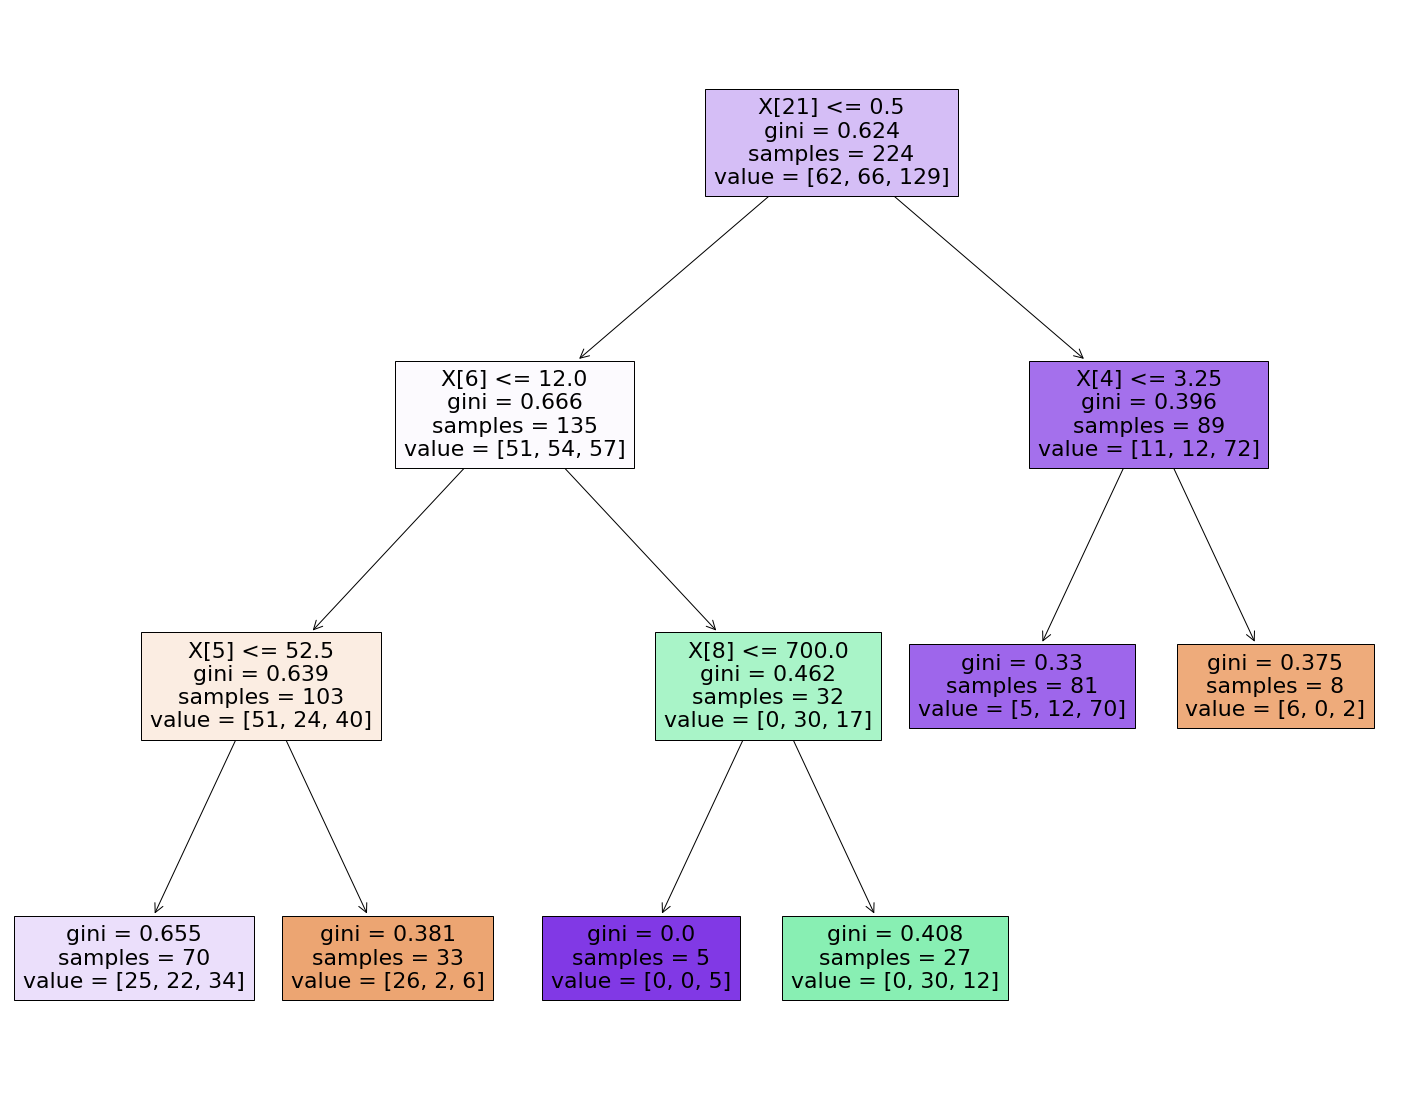

In [31]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(my_DT_model,
                   filled=True)

In [32]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7],
          'min_samples_split' : [2, 3, 4],
          'min_samples_leaf' : [1, 2, 3],
          'max_leaf_nodes' : [4, 5, 6]
         }

grid_search = GridSearchCV(my_DT_model, param_grid= params)

In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight={'died': 1,
                                                            'euthanized': 2,
                                                            'lived': 1},
                                              max_depth=3, max_leaf_nodes=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7], 'max_leaf_nodes': [4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [34]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [35]:
my_best_preds = grid_search.predict(X_test)

In [36]:
accuracy_score(y_test, my_best_preds)

0.6533333333333333

In [37]:
print(classification_report(y_test, my_best_preds))

              precision    recall  f1-score   support

        died       0.64      0.47      0.54        15
  euthanized       0.36      0.45      0.40        11
       lived       0.74      0.76      0.75        49

    accuracy                           0.65        75
   macro avg       0.58      0.56      0.56        75
weighted avg       0.66      0.65      0.65        75

